# 데이터 불러오기

In [25]:
# 데이터 불러오기
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

total = pd.read_csv(r"C:\Users\james\Traffic_Volume_Prediction\Data\refined_data.csv")
total

,일자,Hour,1005004000_velocity,1050003300_velocity,1050020400_velocity,1070000200_velocity,1070000500_velocity,1070001600_velocity,D-08 유입_traffic,D-08 유출_traffic,F-03 유입_traffic,F-04 유출_traffic,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,20220419,1,39.82,73.83,18.79,76.42,66.08,90.92,550.0,712.0,1079.0,969.0,11.4,NaN,1.4,63.0,NaN
1,20220419,2,42.19,76.08,14.66,75.08,68.00,92.50,380.0,625.0,829.0,828.0,11.0,NaN,1.3,68.0,NaN
2,20220419,3,43.04,75.50,16.46,74.25,66.50,92.08,410.0,495.0,689.0,709.0,10.4,NaN,1.7,69.0,NaN
3,20220419,4,34.34,74.42,18.91,76.67,67.42,89.83,624.0,709.0,1020.0,1011.0,10.1,NaN,1.0,72.0,NaN
4,20220419,5,35.92,75.83,20.45,76.17,66.83,90.50,1275.0,1222.0,2463.0,2526.0,9.7,NaN,1.1,74.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20758,20240831,20,29.76,73.92,21.85,54.08,64.50,50.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20759,20240831,21,28.94,74.42,21.24,65.00,63.67,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20760,20240831,22,29.84,76.17,22.67,56.75,63.00,44.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20761,20240831,23,29.66,75.92,23.95,64.50,63.92,54.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## train, test 분리

In [26]:
total['Year'] = total['일자'].astype(str).str[:4].astype(int)
total['Month'] = total['일자'].astype(str).str[4:6].astype(int)
total['Day'] = total['일자'].astype(str).str[6:8].astype(int)

print(total[['일자', 'Year', 'Month', 'Day']].head())

         일자  Year  Month  Day
0  20220419  2022      4   19
1  20220419  2022      4   19
2  20220419  2022      4   19
3  20220419  2022      4   19
4  20220419  2022      4   19


In [27]:
total = total[~(((total['Year'] == 2024) & (total['Month'] == 8)) | ((total['Year'] == 2024) & (total['Month'] == 7)  & (total['Day'] == 31)))]
total.tail()

,일자,Hour,1005004000_velocity,1050003300_velocity,1050020400_velocity,1070000200_velocity,1070000500_velocity,1070001600_velocity,D-08 유입_traffic,D-08 유출_traffic,F-03 유입_traffic,F-04 유출_traffic,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),Year,Month,Day
20000,20240730,20,22.97,7.25,20.47,18.42,41.92,44.75,NaN,NaN,3504.0,2867.0,29.2,NaN,2.4,78.0,NaN,2024,7,30
20001,20240730,21,25.02,58.92,23.60,37.42,62.50,44.92,NaN,NaN,3535.0,2821.0,28.6,NaN,2.6,81.0,NaN,2024,7,30
20002,20240730,22,30.20,76.67,21.85,55.67,63.50,49.58,NaN,NaN,3281.0,2797.0,28.2,NaN,2.4,82.0,NaN,2024,7,30
20003,20240730,23,30.19,75.42,19.79,60.17,65.00,56.08,NaN,NaN,2498.0,2238.0,27.9,NaN,2.1,84.0,NaN,2024,7,30
20004,20240730,24,31.66,83.17,22.12,68.25,63.83,70.17,NaN,NaN,1436.0,1432.0,26.8,NaN,3.2,85.0,NaN,2024,7,30


In [28]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20005 entries, 0 to 20004
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   일자                   20005 non-null  int64  
 1   Hour                 20005 non-null  int64  
 2   1005004000_velocity  20005 non-null  float64
 3   1050003300_velocity  19970 non-null  float64
 4   1050020400_velocity  20005 non-null  float64
 5   1070000200_velocity  19972 non-null  float64
 6   1070000500_velocity  19972 non-null  float64
 7   1070001600_velocity  19959 non-null  float64
 8   D-08 유입_traffic      13012 non-null  float64
 9   D-08 유출_traffic      13018 non-null  float64
 10  F-03 유입_traffic      19292 non-null  float64
 11  F-04 유출_traffic      19304 non-null  float64
 12  기온(°C)               20005 non-null  float64
 13  강수량(mm)              2538 non-null   float64
 14  풍속(m/s)              19937 non-null  float64
 15  습도(%)                20005 non-null  floa

In [29]:
total.isnull().sum()

일자                         0
Hour                       0
1005004000_velocity        0
1050003300_velocity       35
1050020400_velocity        0
1070000200_velocity       33
1070000500_velocity       33
1070001600_velocity       46
D-08 유입_traffic         6993
D-08 유출_traffic         6987
F-03 유입_traffic          713
F-04 유출_traffic          701
기온(°C)                     0
강수량(mm)                17467
풍속(m/s)                   68
습도(%)                      0
적설(cm)                 19157
Year                       0
Month                      0
Day                        0
dtype: int64

In [30]:
train = total[~((total['Year'] == 2024) & (total['Month'] == 7))]
test = total[((total['Year'] == 2024) & (total['Month'] == 7))]
print(train.shape, test.shape)

(19285, 20) (720, 20)


# Feature Engineering

## 파생변수 추가

In [31]:
import holidays
import numpy as np

dfs = [train, test]

for df in dfs:
    df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')

    # 1. 주말 여부 추가
    df['is_weekend'] = df['일자'].dt.dayofweek >= 5  # 토요일(5) 또는 일요일(6)일 경우 True

    # 2. 공휴일 여부 추가 (한국 공휴일 기준)
    kr_holidays = holidays.KR(years=df['Year'].unique())  # 한국 공휴일
    df['is_holiday'] = df['일자'].isin(kr_holidays)

    # 3. 출퇴근 시간 7~9, 17~19
    df['is_morning_rush'] = df['Hour'].between(7, 9)
    df['is_evening_rush'] = df['Hour'].between(17, 19)

    # 4. 주기성 인식(Day는 drop)
    # 4.1. 월 주기성 추가 (1월~12월)
    df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

    # 4.2. 시간 주기성 추가 (0시~23시)
    df['hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

    print(df.shape)

(19285, 28)
(720, 28)


## encoding

In [32]:
one_hot_columns = [
  #  "season"
]

if one_hot_columns:
    combined = pd.concat([train, test], keys=['train', 'test']).reset_index(level=0).rename(columns={'level_0': 'source'})

    one_hot_columns = ["season"]
    for column in one_hot_columns:
        combined = pd.get_dummies(combined, columns=[column], prefix=f'{column}')

    train = combined[combined['source'] == 'train'].drop(columns=['source'])
    test = combined[combined['source'] == 'test'].drop(columns=['source'])

In [33]:
train.columns

Index(['일자', 'Hour', '1005004000_velocity', '1050003300_velocity',
       '1050020400_velocity', '1070000200_velocity', '1070000500_velocity',
       '1070001600_velocity', 'D-08 유입_traffic', 'D-08 유출_traffic',
       'F-03 유입_traffic', 'F-04 유출_traffic', '기온(°C)', '강수량(mm)', '풍속(m/s)',
       '습도(%)', '적설(cm)', 'Year', 'Month', 'Day', 'is_weekend', 'is_holiday',
       'is_morning_rush', 'is_evening_rush', 'month_sin', 'month_cos',
       'hour_sin', 'hour_cos'],
      dtype='object')

## column drop

In [34]:
drop_columns=[
    '일자',
    'Month',
    'Day',
    'Hour',
    'D-08 유입_traffic',
    'D-08 유출_traffic'
]

train = train.copy()
test = test.copy()

for column in drop_columns:
    if column in train.columns:
        train.drop(columns=column, inplace=True)
        test.drop(columns=column, inplace=True)
        print(f"(column명: {column})를 drop했습니다.")

(column명: 일자)를 drop했습니다.
(column명: Month)를 drop했습니다.
(column명: Day)를 drop했습니다.
(column명: Hour)를 drop했습니다.
(column명: D-08 유입_traffic)를 drop했습니다.
(column명: D-08 유출_traffic)를 drop했습니다.


# Modeling

## X, y 분리

In [35]:
train.columns

Index(['1005004000_velocity', '1050003300_velocity', '1050020400_velocity',
       '1070000200_velocity', '1070000500_velocity', '1070001600_velocity',
       'F-03 유입_traffic', 'F-04 유출_traffic', '기온(°C)', '강수량(mm)', '풍속(m/s)',
       '습도(%)', '적설(cm)', 'Year', 'is_weekend', 'is_holiday',
       'is_morning_rush', 'is_evening_rush', 'month_sin', 'month_cos',
       'hour_sin', 'hour_cos'],
      dtype='object')

In [36]:
# X_train과 y_train 설정
X_train = train.drop(columns=['1005004000_velocity'])
y_train = train[['1005004000_velocity']]

# X_test와 y_test 설정
X_test = test.drop(columns=['1005004000_velocity'])
y_test = test[['1005004000_velocity']]

## Sliding Window 방식의 모델링

In [37]:
# import pandas as pd
# import lightgbm as lgb
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.model_selection import TimeSeriesSplit

# N_TEST = 12
# N_SPLIT = 27

# tscv = TimeSeriesSplit(n_splits=N_SPLIT)
# prev_val_idx = 0

# trials = 1

# # 모델 및 평가 지표 초기화
# mape_scores = []
# for train_idx, val_idx in tscv.split(X_train):
#     if trials <= N_SPLIT - N_TEST:
#         trials+=1
#         continue

#     X_tr, X_val = X_train.iloc[prev_val_idx:train_idx[-1]], X_train.iloc[val_idx]
#     y_tr, y_val = y_train.iloc[prev_val_idx:train_idx[-1]], y_train.iloc[val_idx]
    
#     # LightGBM 모델 학습 (MAPE 손실 함수 사용)
#     model = lgb.LGBMRegressor(objective='mape', verbose=-1)
#     model.fit(X_tr, y_tr.values.ravel()) 
    
#     # 예측 및 성능 평가
#     y_pred = model.predict(X_val)
#     mape = mean_absolute_percentage_error(y_val, y_pred)
#     mape_scores.append(mape)

#     prev_val_idx += len(val_idx)
#     print(f"Validation MAPE: {mape}")

# #  테스트 세트 예측
# model = lgb.LGBMRegressor(objective='mape', verbose=-1)
# model.fit(X_train, y_train.values.ravel()) 
# y_test_pred = model.predict(X_test)
# test_mape = mean_absolute_percentage_error(y_test, y_test_pred)


# # 결과 출력
# print("")
# print("Results: ")
# print("Average Validation MAPE:", sum(mape_scores) / len(mape_scores))
# print("Final Test MAPE:", test_mape)

# # Results: 
# # Average Validation MAPE: 0.08974671124807292
# # Final Test MAPE: 0.07499468314017955

In [54]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# 설정 값
N_TEST = 12
N_SPLIT = 27

lgb_params = {
    'learning_rate': 0.05539518575134502,
    'num_leaves': 61,
    'max_depth': 11,
    'min_child_samples': 19,
    'subsample': 0.7568040269300671,
    'colsample_bytree': 0.9344847364401246,
    'reg_alpha': 8.362385265372425e-07,
    'reg_lambda': 1.4885474437486085e-07,
    'n_jobs': -1
}

# TimeSeriesSplit 설정
tscv = TimeSeriesSplit(n_splits=N_SPLIT)

# MAPE 점수 리스트
mape_scores = []
trials = 1

# TimeSeriesSplit을 이용한 검증
for train_idx, val_idx in tscv.split(X_train):
    if trials <= N_SPLIT - N_TEST:
        trials += 1
        continue

    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # LightGBM 모델 학습
    lgb_model = lgb.LGBMRegressor(objective='mape', verbose=-1, **lgb_params)
    lgb_model.fit(X_tr, y_tr.values.ravel()) 
    
    # 예측 및 MAPE 계산
    y_pred = lgb_model.predict(X_val)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    mape_scores.append(mape)
    print(f"validation MAPE: {mape}")

# 테스트 세트에 대한 최종 예측
lgb_model = lgb.LGBMRegressor(objective='mape', verbose=-1, **lgb_params)
lgb_model.fit(X_train, y_train.values.ravel()) 
y_test_pred = lgb_model.predict(X_test)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# 결과 출력
print("")
print("Results: ")
print("Average Validation MAPE:", np.mean(mape_scores))
print("Validation MAPE Std Dev:", np.std(mape_scores))
print("Final Test MAPE:", test_mape)

validation MAPE: 0.08047840971538582
validation MAPE: 0.08209622858636742
validation MAPE: 0.12377422634691218
validation MAPE: 0.10741003137206655
validation MAPE: 0.08955773759123385
validation MAPE: 0.0698211353326101
validation MAPE: 0.06568338392380096
validation MAPE: 0.06752584576995073
validation MAPE: 0.07164812333734623
validation MAPE: 0.06315542825195812
validation MAPE: 0.08818203422392365
validation MAPE: 0.07448732052894842

Results: 
Average Validation MAPE: 0.08198499208170867
Validation MAPE Std Dev: 0.01739538217703308
Final Test MAPE: 0.06971506928900646


## 파라미터 최적화(lgbm)

Params: 
    learning_rate: 0.05539518575134502
    num_leaves: 61
    max_depth: 11
    min_child_samples: 19
    subsample: 0.7568040269300671
    colsample_bytree: 0.9344847364401246
    reg_alpha: 8.362385265372425e-07
    reg_lambda: 1.4885474437486085e-07

In [1]:
# import lightgbm as lgb
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.model_selection import TimeSeriesSplit
# import optuna
# import numpy as np

# # 설정 값
# N_TEST = 12
# N_SPLIT = 27

# # TimeSeriesSplit 설정
# tscv = TimeSeriesSplit(n_splits=N_SPLIT)

# # 최적화 목표 함수 정의
# def objective(trial):
#     # 하이퍼파라미터 탐색 범위 정의
#     param = {
#         'objective': 'mape',
#         'metric': 'mape',
#         'verbosity': -1,
#         'boosting_type': 'gbdt',
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 200),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0)
#     }
    
#     mape_scores = []
#     trials = 1

#     # TimeSeriesSplit을 사용한 교차 검증
#     for train_idx, val_idx in tscv.split(X_train):
#         if trials <= N_SPLIT - N_TEST:
#             trials += 1
#             continue

#         X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
#         y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

#         # 모델 학습
#         model = lgb.LGBMRegressor(**param)
#         model.fit(X_tr, y_tr.values.ravel())

#         # 예측 및 MAPE 계산
#         y_pred = model.predict(X_val)
#         mape = mean_absolute_percentage_error(y_val, y_pred)
#         mape_scores.append(mape)

#     # 평균 MAPE 반환 (Optuna가 최소화할 값)
#     return np.mean(mape_scores)

# # Optuna 스터디 생성 및 최적화 실행
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # 최적 하이퍼파라미터 및 결과 출력
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")

# # 최적 파라미터로 최종 모델 학습 및 테스트 예측
# best_params = trial.params
# model = lgb.LGBMRegressor(**best_params)
# model.fit(X_train, y_train.values.ravel())
# y_test_pred = model.predict(X_test)
# test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# # 최종 결과 출력
# print("\nFinal Test MAPE:", test_mape)

In [53]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# 설정 값
N_TEST = 12
N_SPLIT = 27

# TimeSeriesSplit 설정
tscv = TimeSeriesSplit(n_splits=N_SPLIT)

xgb_params = {
    'learning_rate': 0.04103280144974674,
    'max_depth': 9,
    'min_child_weight': 4,
    'subsample': 0.9087585282462496,
    'colsample_bytree': 0.9365599161970767,
    'reg_alpha': 0.003988120714943189,
    'reg_lambda': 0.00025334295620637205,
    'n_jobs': -1,
}

# MAPE 점수 리스트
mape_scores = []
trials = 1

# TimeSeriesSplit을 이용한 검증
for train_idx, val_idx in tscv.split(X_train):
    if trials <= N_SPLIT - N_TEST:
        trials += 1
        continue

    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # XGBoost 모델 학습
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', verbosity=0, **xgb_params)
    xgb_model.fit(X_tr, y_tr.values.ravel())
    
    # 예측 및 MAPE 계산
    y_pred = xgb_model.predict(X_val)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    mape_scores.append(mape)
    print(f"validation MAPE: {mape}")

# 테스트 세트에 대한 최종 예측
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', verbosity=0, **xgb_params)
xgb_model.fit(X_train, y_train.values.ravel())
y_test_pred = xgb_model.predict(X_test)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# 결과 출력
print("\nResults:")
print("Average Validation MAPE:", np.mean(mape_scores))
print("Validation MAPE Std Dev:", np.std(mape_scores))
print("Final Test MAPE:", test_mape)

validation MAPE: 0.0804718725233316
validation MAPE: 0.08547083671447293
validation MAPE: 0.12344532131997883
validation MAPE: 0.12286997769175165
validation MAPE: 0.08866505337512225
validation MAPE: 0.0707301422584442
validation MAPE: 0.06529456125780483
validation MAPE: 0.06695300758747451
validation MAPE: 0.07271325089486867
validation MAPE: 0.0662508904029486
validation MAPE: 0.09287142644436677
validation MAPE: 0.07767684747084966

Results:
Average Validation MAPE: 0.08445109899511788
Validation MAPE Std Dev: 0.019318447570747795
Final Test MAPE: 0.07186582694326046


In [41]:
# import xgboost as xgb
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.model_selection import TimeSeriesSplit
# import optuna
# import numpy as np

# # 설정 값
# N_TEST = 12
# N_SPLIT = 27

# # TimeSeriesSplit 설정
# tscv = TimeSeriesSplit(n_splits=N_SPLIT)

# # 최적화 목표 함수 정의
# def objective(trial):
#     # 하이퍼파라미터 탐색 범위 정의
#     param = {
#         'objective': 'reg:squarederror',  # 기본 손실 함수 사용
#         'verbosity': 0,
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
#         'n_jobs': -1  
#     }
    
#     mape_scores = []
#     trials = 1

#     # TimeSeriesSplit을 사용한 교차 검증
#     for train_idx, val_idx in tscv.split(X_train):
#         if trials <= N_SPLIT - N_TEST:
#             trials += 1
#             continue

#         X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
#         y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

#         # 모델 학습
#         model = xgb.XGBRegressor(**param)
#         model.fit(X_tr, y_tr.values.ravel())

#         # 예측 및 MAPE 계산
#         y_pred = model.predict(X_val)
#         mape = mean_absolute_percentage_error(y_val, y_pred)
#         mape_scores.append(mape)

#     # 평균 MAPE 반환 (Optuna가 최소화할 값)
#     return np.mean(mape_scores)

# # Optuna 스터디 생성 및 최적화 실행
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # 최적 하이퍼파라미터 및 결과 출력
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")

# # 최적 파라미터로 최종 모델 학습 및 테스트 예측
# best_params = trial.params
# model = xgb.XGBRegressor(**best_params)
# model.fit(X_train, y_train.values.ravel())
# y_test_pred = model.predict(X_test)
# test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# # 최종 결과 출력
# print("\nFinal Test MAPE:", test_mape)

[I 2024-10-30 20:51:32,013] A new study created in memory with name: no-name-1840f19c-1778-4f99-92af-c9177ebac3ea
[I 2024-10-30 20:51:36,711] Trial 0 finished with value: 0.08834029031519493 and parameters: {'learning_rate': 0.034134839325071505, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.799111237844738, 'colsample_bytree': 0.5125263225124344, 'reg_alpha': 0.10797090134337362, 'reg_lambda': 6.307292023354767e-06}. Best is trial 0 with value: 0.08834029031519493.
[I 2024-10-30 20:51:48,479] Trial 1 finished with value: 0.08491559216979667 and parameters: {'learning_rate': 0.033346842605637576, 'max_depth': 11, 'min_child_weight': 3, 'subsample': 0.8510883265507709, 'colsample_bytree': 0.888695826093188, 'reg_alpha': 1.3507671150528655e-06, 'reg_lambda': 0.0007823127932717295}. Best is trial 1 with value: 0.08491559216979667.
[I 2024-10-30 20:51:58,411] Trial 2 finished with value: 0.09552031975729935 and parameters: {'learning_rate': 0.015441705613205124, 'max_depth': 13, 'm

Best trial:
  Value:  0.08445109899511788
  Params: 
    learning_rate: 0.04103280144974674
    max_depth: 9
    min_child_weight: 4
    subsample: 0.9087585282462496
    colsample_bytree: 0.9365599161970767
    reg_alpha: 0.003988120714943189
    reg_lambda: 0.00025334295620637205

Final Test MAPE: 0.07186582694326046


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# 설정 값
N_TEST = 12
N_SPLIT = 27

# TimeSeriesSplit 설정
tscv = TimeSeriesSplit(n_splits=N_SPLIT)

rf_params ={
    'n_estimators': 177,
    'max_depth': 17,
    'min_samples_split': 15,
    'min_samples_leaf': 1,
    'max_features': 0.7021281938854346,
    'n_jobs': -1,  # 모든 CPU 코어 사용
    'random_state': 42
}

# MAPE 점수 리스트
mape_scores = []
trials = 1

# TimeSeriesSplit을 이용한 검증
for train_idx, val_idx in tscv.split(X_train):
    if trials <= N_SPLIT - N_TEST:
        trials += 1
        continue

    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # RandomForest 모델 학습
    rf_model = RandomForestRegressor( **rf_params)
    rf_model.fit(X_tr, y_tr.values.ravel())
    
    # 예측 및 MAPE 계산
    y_pred = rf_model.predict(X_val)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    mape_scores.append(mape)
    print(f"validation MAPE: {mape}")

# 테스트 세트에 대한 최종 예측
rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(X_train, y_train.values.ravel())
y_test_pred = rf_model.predict(X_test)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# 결과 출력
print("\nResults:")
print("Average Validation MAPE:", np.mean(mape_scores))
print("Validation MAPE Std Dev:", np.std(mape_scores))
print("Final Test MAPE:", test_mape)

validation MAPE: 0.07955206243042139
validation MAPE: 0.08216739819259268
validation MAPE: 0.12642771359315633
validation MAPE: 0.12074367246389989
validation MAPE: 0.0901537862020026
validation MAPE: 0.0720401623858505
validation MAPE: 0.06534198210814844
validation MAPE: 0.06642731323676349
validation MAPE: 0.07154659266441533
validation MAPE: 0.06510341076442674
validation MAPE: 0.09274401254118113
validation MAPE: 0.0787891156026161

Results:
Average Validation MAPE: 0.08425310184878955
Validation MAPE Std Dev: 0.01963455597700515
Final Test MAPE: 0.07122739444273965


In [44]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.model_selection import TimeSeriesSplit
# import optuna
# import numpy as np

# # 설정 값
# N_TEST = 12
# N_SPLIT = 27

# # TimeSeriesSplit 설정
# tscv = TimeSeriesSplit(n_splits=N_SPLIT)

# # 최적화 목표 함수 정의
# def objective(trial):
#     # 하이퍼파라미터 탐색 범위 정의
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#         'max_depth': trial.suggest_int('max_depth', 5, 30),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
#         'n_jobs': -1,  # 모든 CPU 코어 사용
#         'random_state': 42
#     }
    
#     mape_scores = []
#     trials = 1

#     # TimeSeriesSplit을 사용한 교차 검증
#     for train_idx, val_idx in tscv.split(X_train):
#         if trials <= N_SPLIT - N_TEST:
#             trials += 1
#             continue

#         X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
#         y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

#         # 모델 학습
#         model = RandomForestRegressor(**param)
#         model.fit(X_tr, y_tr.values.ravel())

#         # 예측 및 MAPE 계산
#         y_pred = model.predict(X_val)
#         mape = mean_absolute_percentage_error(y_val, y_pred)
#         mape_scores.append(mape)

#     # 평균 MAPE 반환 (Optuna가 최소화할 값)
#     return np.mean(mape_scores)

# # Optuna 스터디 생성 및 최적화 실행
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # 최적 하이퍼파라미터 및 결과 출력
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")

# # 최적 파라미터로 최종 모델 학습 및 테스트 예측
# best_params = trial.params
# model = RandomForestRegressor(**best_params)
# model.fit(X_train, y_train.values.ravel())
# y_test_pred = model.predict(X_test)
# test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# # 최종 결과 출력
# print("\nFinal Test MAPE:", test_mape)

[I 2024-10-30 21:10:56,740] A new study created in memory with name: no-name-31baea6c-02c7-4ebb-91cf-a28e0b9f2908
[I 2024-10-30 21:11:05,977] Trial 0 finished with value: 0.08565792626248696 and parameters: {'n_estimators': 79, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 0.9003803228644778}. Best is trial 0 with value: 0.08565792626248696.
[I 2024-10-30 21:11:19,666] Trial 1 finished with value: 0.08538734044433034 and parameters: {'n_estimators': 206, 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 9, 'max_features': 0.4907061735290087}. Best is trial 1 with value: 0.08538734044433034.
[I 2024-10-30 21:11:33,630] Trial 2 finished with value: 0.09695454428930951 and parameters: {'n_estimators': 210, 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 0.9926740773542486}. Best is trial 1 with value: 0.08538734044433034.
[I 2024-10-30 21:11:47,141] Trial 3 finished with value: 0.08639049842224984 and parameter

Best trial:
  Value:  0.08425310184878955
  Params: 
    n_estimators: 177
    max_depth: 17
    min_samples_split: 15
    min_samples_leaf: 1
    max_features: 0.7021281938854346

Final Test MAPE: 0.07175225598722727


In [55]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# 설정 값
N_TEST = 12
N_SPLIT = 27

# 모델별 하이퍼파라미터 딕셔너리
params = {
    'lightgbm': {
        'objective': 'mape',
        'verbose': -1,
        'learning_rate': 0.05539518575134502, 
        'num_leaves': 61, 
        'max_depth': 11, 
        'min_child_samples': 19, 
        'subsample': 0.7568040269300671, 
        'colsample_bytree': 0.9344847364401246, 
        'reg_alpha': 8.362385265372425e-07, 
        'reg_lambda': 1.4885474437486085e-07,
        'n_jobs': -1
    },
    'xgboost': {
        'objective': 'reg:squarederror',
        'verbosity': 0,
        'learning_rate': 0.04103280144974674,
        'max_depth': 9,
        'min_child_weight': 4,
        'subsample': 0.9087585282462496,
        'colsample_bytree': 0.9365599161970767,
        'reg_alpha': 0.003988120714943189,
        'reg_lambda': 0.00025334295620637205,
        'n_jobs': -1
    },
    'randomforest': {
        'n_estimators': 177,
        'max_depth': 17,
        'min_samples_split': 15,
        'min_samples_leaf': 1,
        'max_features': 0.7021281938854346,
        'n_jobs': -1, 
        'random_state': 42
    },
    'final_estimator': {
        'objective': 'mape',
        'verbose': -1,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'n_jobs': -1
    }
}

# TimeSeriesSplit 설정
tscv = TimeSeriesSplit(n_splits=N_SPLIT)

# 스태킹 앙상블을 위한 기본 모델 설정
base_estimators = [
    ('lightgbm', lgb.LGBMRegressor(**params['lightgbm'])),
    ('xgboost', xgb.XGBRegressor(**params['xgboost'])),
    ('randomforest', RandomForestRegressor(**params['randomforest']))
]

# 최종 메타 모델로 LightGBM 설정
stacking_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=lgb.LGBMRegressor(**params['final_estimator'])
)

# MAPE 점수 리스트
mape_scores = []
trials = 1

# TimeSeriesSplit을 이용한 검증
for train_idx, val_idx in tscv.split(X_train):
    if trials <= N_SPLIT - N_TEST:
        trials += 1
        continue

    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Stacking 모델 학습
    stacking_model.fit(X_tr, y_tr.values.ravel())
    
    # 예측 및 MAPE 계산
    y_pred = stacking_model.predict(X_val)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    mape_scores.append(mape)
    print(f"validation MAPE: {mape}")

# 테스트 세트에 대한 최종 예측
stacking_model.fit(X_train, y_train.values.ravel())
y_test_pred = stacking_model.predict(X_test)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# 결과 출력
print("\nResults:")
print("Average Validation MAPE:", np.mean(mape_scores))
print("Validation MAPE Std Dev:", np.std(mape_scores))
print("Final Test MAPE:", test_mape)


validation MAPE: 0.07897072798243777
validation MAPE: 0.08300701999109687
validation MAPE: 0.12312213306961652
validation MAPE: 0.11128740515232677
validation MAPE: 0.08978751504126223
validation MAPE: 0.0721352511450314
validation MAPE: 0.06672773703852845
validation MAPE: 0.06877844317496967
validation MAPE: 0.07255744101513263
validation MAPE: 0.06557651087158362
validation MAPE: 0.0893290012991206
validation MAPE: 0.07649473079055438

Results:
Average Validation MAPE: 0.08314782638097173
Validation MAPE Std Dev: 0.017204863285169802
Final Test MAPE: 0.06993933751687643


# Analysis

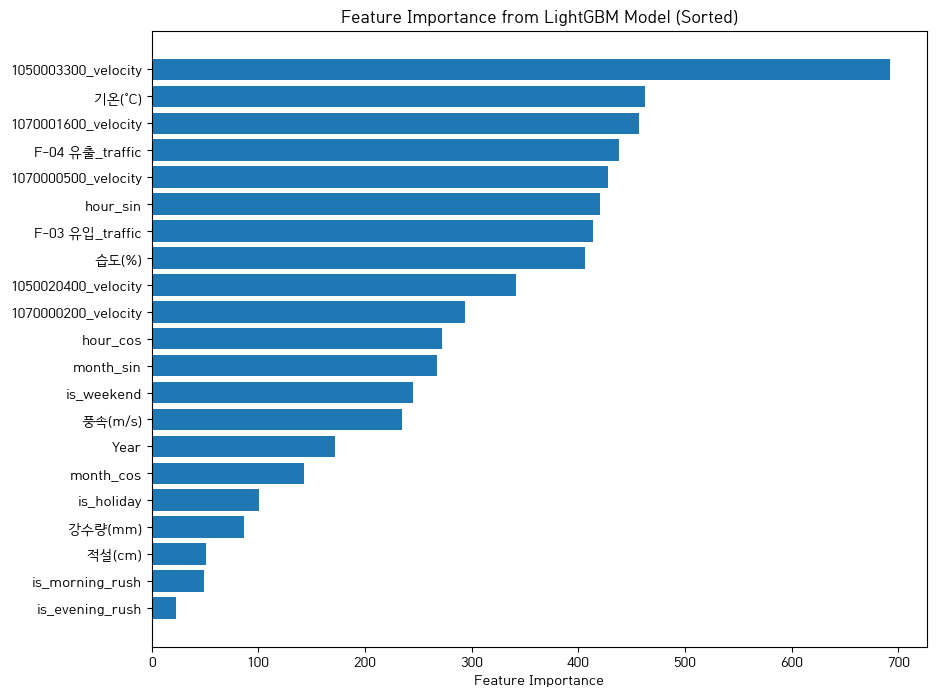

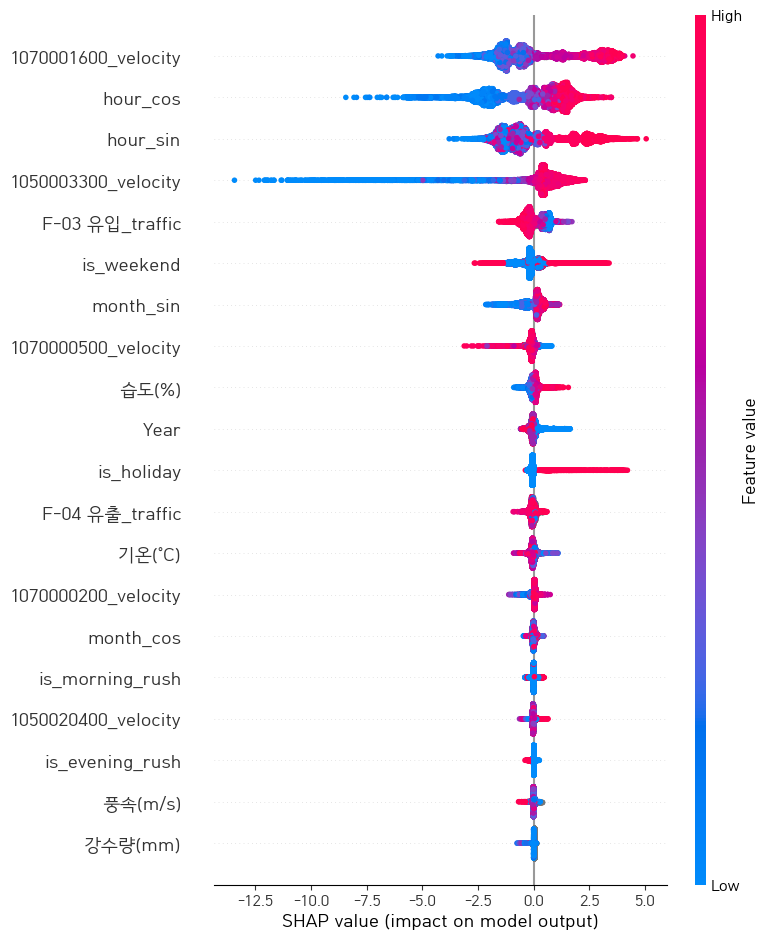

In [56]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import numpy as np

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/HANDotum.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False  
import shap

# 1. Feature Importance (LightGBM 제공)
# Feature importance 시각화
feature_importances = lgb_model.feature_importances_
feature_names = X_train.columns

# Feature Importance 정렬 (내림차순)
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = X_train.columns[sorted_idx]

# 정렬된 중요도 막대그래프
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_feature_importances, align='center')
plt.xlabel("Feature Importance")
plt.title("Feature Importance from LightGBM Model (Sorted)")
plt.gca().invert_yaxis()  # y축을 내림차순으로 정렬
plt.show()

# 2. SHAP Analysis
# SHAP 값을 계산하고, 각 feature의 영향력을 시각화
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_train)

# Summary plot: 전체 feature의 SHAP 값 시각화
shap.summary_plot(shap_values, X_train)

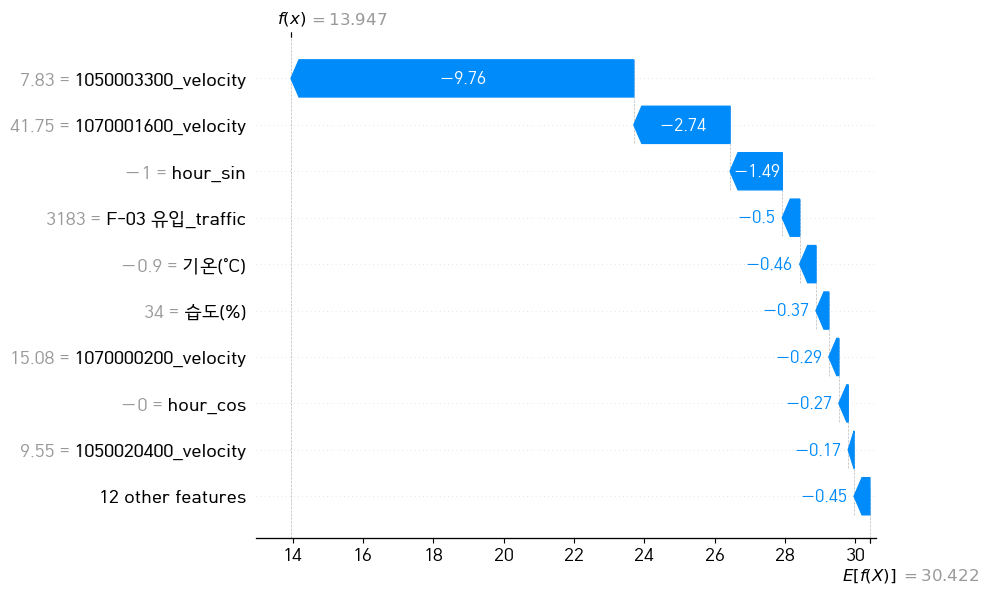

In [85]:
# 데이터 포인트의 SHAP waterfall plot 생성
shap.waterfall_plot(shap.Explanation(values=shap_values[19182], base_values=explainer.expected_value, data=X_train.iloc[14022]))

# 그래프 표시
plt.show()

In [84]:
total.loc[19182, :]

일자                     20240626.00
Hour                         18.00
1005004000_velocity          10.52
1050003300_velocity           9.83
1050020400_velocity          19.08
1070000200_velocity          16.75
1070000500_velocity          33.25
1070001600_velocity          50.08
D-08 유입_traffic                NaN
D-08 유출_traffic                NaN
F-03 유입_traffic            3748.00
F-04 유출_traffic            2981.00
기온(°C)                       29.40
강수량(mm)                        NaN
풍속(m/s)                       4.20
습도(%)                        46.00
적설(cm)                         NaN
Year                       2024.00
Month                         6.00
Day                          26.00
Name: 19182, dtype: float64